# Recursive Text Editing: Result Analysis

In [773]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

__author__ = 'Shining'
__email__ = 'mrshininnnnn@gmail.com'

In [798]:
# dependency
# public
import os
import numpy as np
%matplotlib inline
# private
from utils import *

## Increasing L Analysis

In [782]:
# parameters
method = 'rec' # e2e, tag, rec 
data_mode = 'online' # offline, online
data_src = 'aor' # # aor, aes, aec
model_name = 'bi_lstm_rnn_att' 
num_size = 10
data_size = 50000
min_seq_len = 5
max_seq_len = 10
interval_seq_len = 1
val_or_test = 'test' # val, test

In [783]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    data_mode, 
    model_name, 
    method, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}', 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [784]:
# read data
raw_data_dict = {}
for i in range(min_seq_len, max_seq_len+1, interval_seq_len):
    file_name = os.path.join(LOG_PATH.format(i))
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)

log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_6/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_7/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_8/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_9/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_10/data_size_50000/test.txt


In [785]:
# keys = ['epoch', 'step', 'loss', 'acc', 'token_acc', 'seq_acc']
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [786]:
# 'Epoch', 'Step', 'Loss', 'Token Accuracy', 'Sequence Accuracy', 'Equation Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for i in range(min_seq_len, max_seq_len+1, interval_seq_len):
    label = 'L_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

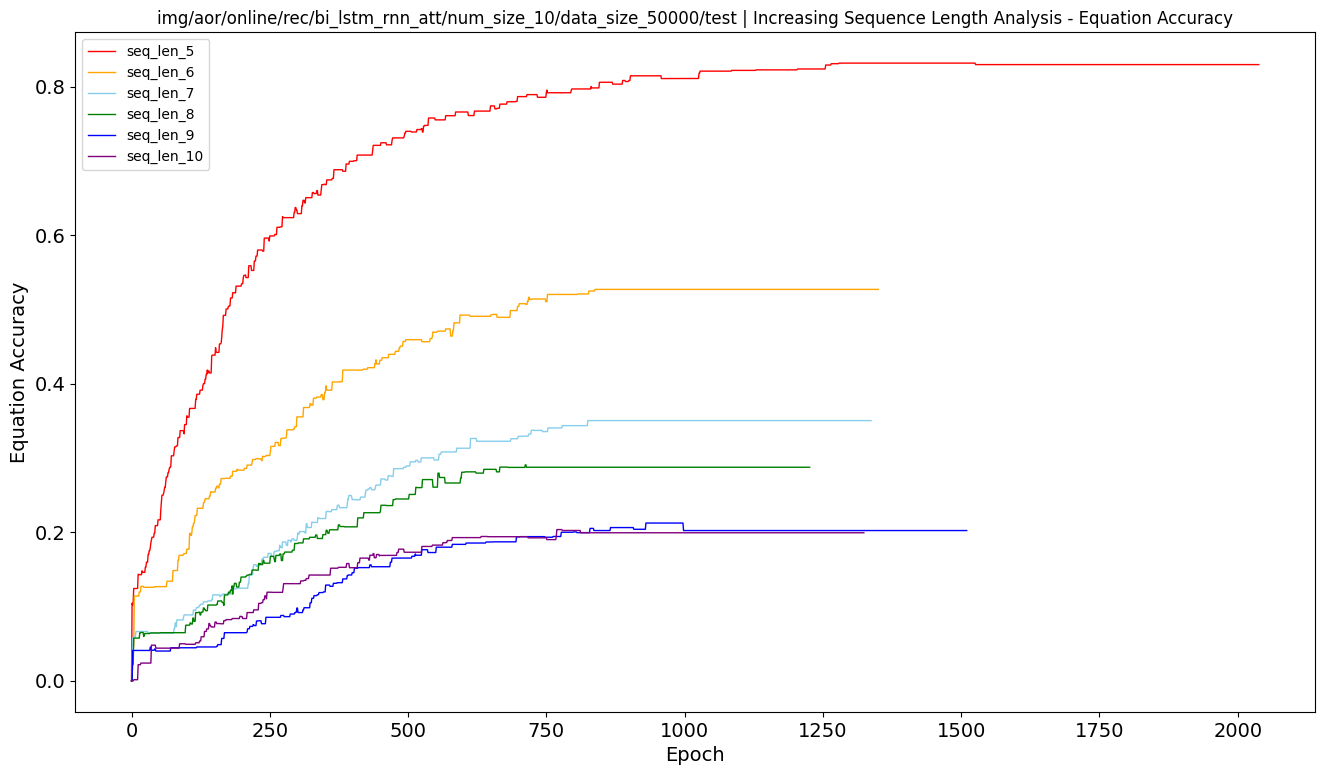

In [787]:
colors = ['red', 'orange', 'skyblue', 'green', 'blue', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Sequence Length Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Increasing D Analysis

In [788]:
# parameters
method = 'rec' # e2e, tag, rec
data_src = 'aor' # aor, aes, aec
data_mode = 'online' # online, offline
# bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
min_data_size = 10000
max_data_size = 50000
val_or_test = 'test' # val, test

In [789]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    data_mode, 
    model_name, 
    method,
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', 
    '{}.txt'.format(val_or_test))

In [790]:
# read data
raw_data_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    file_name = LOG_PATH.format(i)
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)

log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_10000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_20000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_30000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_40000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_50000/test.txt


In [791]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [794]:
# 'Epoch', 'Step', 'Loss', 'Token Accuracy', 'Sequence Accuracy', 'Equation Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    label = 'D_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

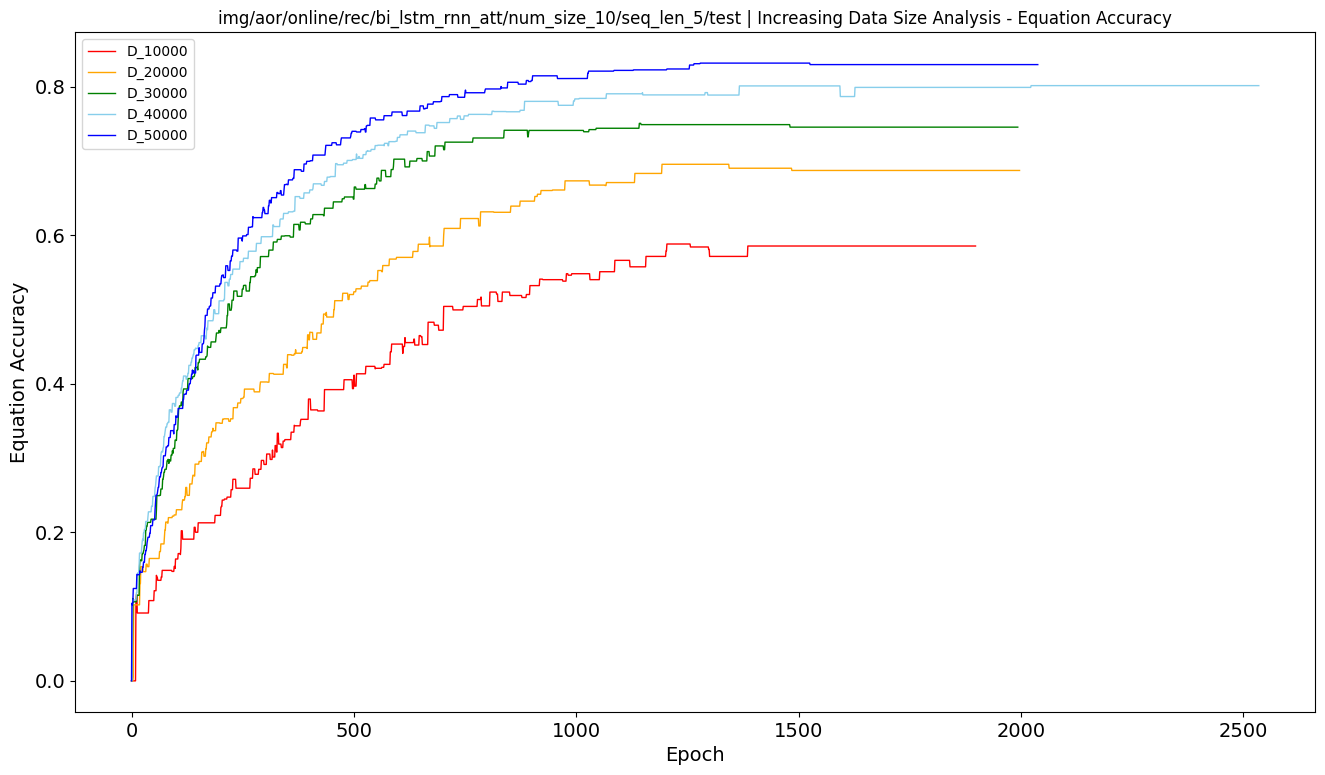

In [795]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods Comparison

In [1328]:
# parameters
candidates = [
    ['offline', 'e2e'], 
    ['online', 'e2e'], 
    ['offline', 'tag'], 
    ['online', 'tag'], 
    ['offline', 'rec'], 
    ['online', 'rec']
]
data_src = 'aec' # aes, aor, aec
model_name = 'bi_lstm_rnn_att' # transformer, bi_lstm_rnn_att
num_size = 50
seq_len = 5
data_size = 10000
val_or_test = 'test' # val, test

In [1329]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode 
    model_name, # model name
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [1330]:
# read data
raw_data_dict = {}
for c in candidates:
    file_path = LOG_PATH.format(c[0], c[1])
    print(file_path)
    raw_data_dict[file_path] = load_txt(file_path)

log/aec/offline/bi_lstm_rnn_att/e2e/num_size_50/seq_len_5/data_size_10000/test.txt
log/aec/online/bi_lstm_rnn_att/e2e/num_size_50/seq_len_5/data_size_10000/test.txt
log/aec/offline/bi_lstm_rnn_att/tag/num_size_50/seq_len_5/data_size_10000/test.txt
log/aec/online/bi_lstm_rnn_att/tag/num_size_50/seq_len_5/data_size_10000/test.txt
log/aec/offline/bi_lstm_rnn_att/rec/num_size_50/seq_len_5/data_size_10000/test.txt
log/aec/online/bi_lstm_rnn_att/rec/num_size_50/seq_len_5/data_size_10000/test.txt


In [1331]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [1332]:
# 'Epoch', 'Step', 'Token Accuracy', 'Sequence Accuracy', 'Equation Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    key = LOG_PATH.format(c[0], c[1])
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

In [1333]:
for k in criteria_dict:
    print(k, criteria_dict[k][-1])

offline_e2e 0.436
online_e2e 0.4233
offline_tag 0.3927
online_tag 0.404
offline_rec 0.412
online_rec 0.4847


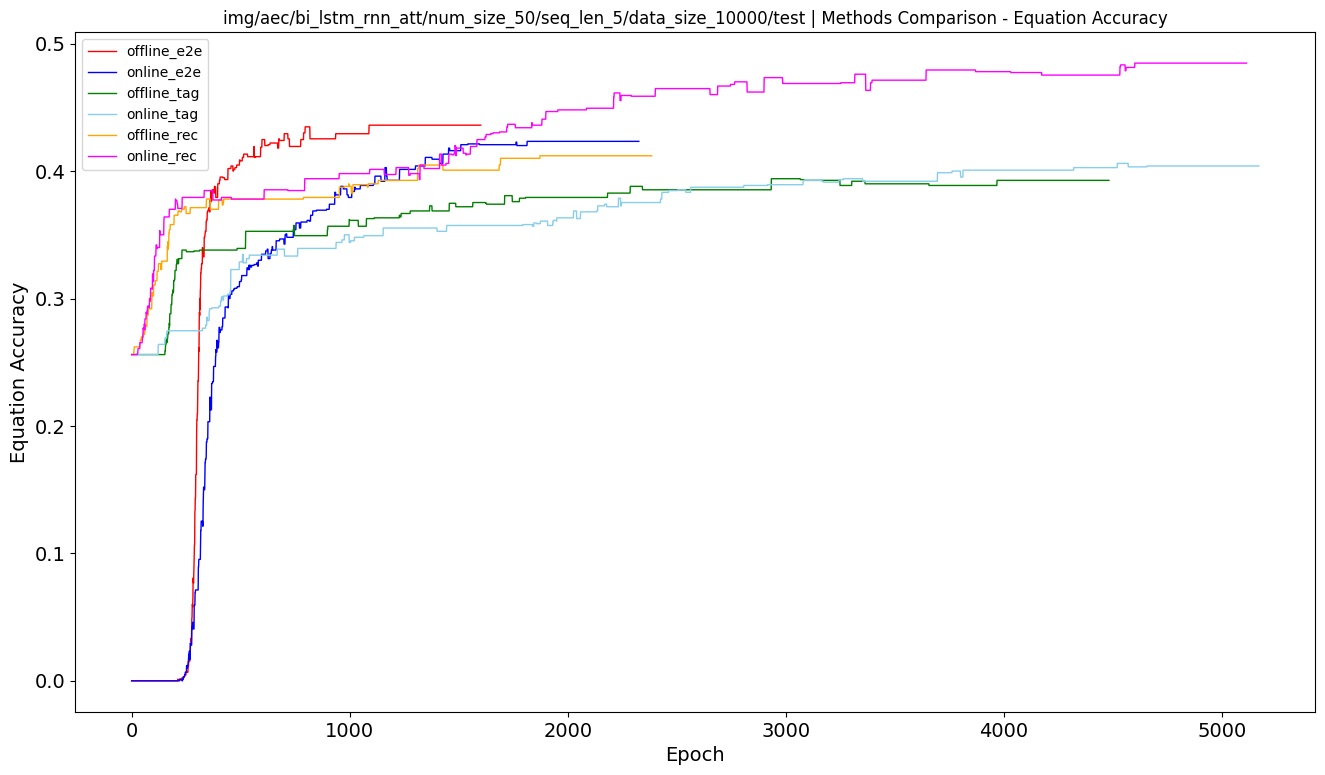

In [1334]:
colors = ['red', 'blue', 'green', 'skyblue', 'orange', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods vs. N

In [1224]:
# parameters
candidates = [
    ['offline', 'e2e'], 
    ['online', 'e2e'], 
    ['offline', 'tag'],
    ['online', 'tag'], 
    ['offline', 'rec'], 
    ['online', 'rec']
]
# aor, aes, aec
data_src = 'aec'
model_name = 'bi_lstm_rnn_att' 
seq_len = 5 
data_size = 10000
min_num_size = 10
max_num_size = 50
interval_num_size = 10
val_or_test = 'test' # val, test

In [1225]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode
    model_name,
    '{}', # method
    'num_size_{}', # number size
    'seq_len_{}'.format(seq_len),
    'data_size_{}'.format(data_size), # data size
    '{}.txt'.format(val_or_test))

In [1226]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_num_size, max_num_size+1, interval_num_size): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)

log/aec/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_10000/test.txt
log/aec/offline/bi_lstm_rnn_att/e2e/num_size_20/seq_len_5/data_size_10000/test.txt
log/aec/offline/bi_lstm_rnn_att/e2e/num_size_30/seq_len_5/data_size_10000/test.txt
log/aec/offline/bi_lstm_rnn_att/e2e/num_size_40/seq_len_5/data_size_10000/test.txt
log/aec/offline/bi_lstm_rnn_att/e2e/num_size_50/seq_len_5/data_size_10000/test.txt
log/aec/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_10000/test.txt
log/aec/online/bi_lstm_rnn_att/e2e/num_size_20/seq_len_5/data_size_10000/test.txt
log/aec/online/bi_lstm_rnn_att/e2e/num_size_30/seq_len_5/data_size_10000/test.txt
log/aec/online/bi_lstm_rnn_att/e2e/num_size_40/seq_len_5/data_size_10000/test.txt
log/aec/online/bi_lstm_rnn_att/e2e/num_size_50/seq_len_5/data_size_10000/test.txt
log/aec/offline/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_10000/test.txt
log/aec/offline/bi_lstm_rnn_att/tag/num_size_20/seq_len_5/data_size_10000/test.txt
log/aec/o

In [1227]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [1228]:
# 'Epoch', 'Step', 'Loss', 'Token Accuracy', 'Sequence Accuracy', 'Equation Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_num_size, max_num_size+1, interval_num_size): 
        key = LOG_PATH.format(c[0], c[1], i)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

In [1229]:
print(criteria_dict)

{'offline_e2e': [0.5513, 0.46, 0.478, 0.4673, 0.436], 'online_e2e': [0.5773, 0.5, 0.49, 0.45, 0.4233], 'offline_tag': [0.444, 0.4153, 0.406, 0.3587, 0.3927], 'online_tag': [0.4733, 0.4447, 0.4273, 0.4413, 0.404], 'offline_rec': [0.562, 0.4993, 0.4747, 0.4433, 0.412], 'online_rec': [0.5827, 0.5493, 0.526, 0.5367, 0.4847]}


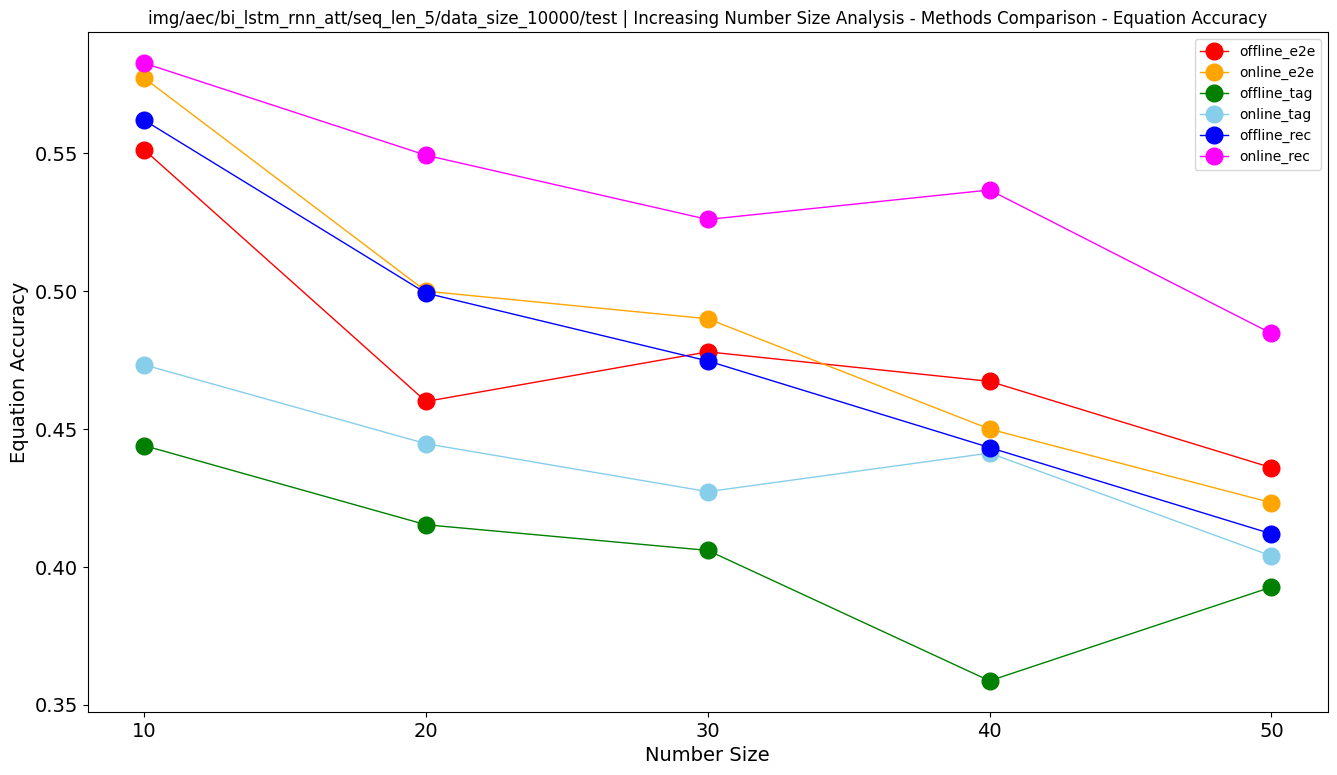

In [1230]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    model_name, 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Number Size Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Number Size', 
    ylabel=criteria, 
    save_path=save_path, 
    xticks=range(min_num_size, max_num_size+1, interval_num_size), 
    marker=True
)

## Methods vs. L

In [1239]:
# parameters
candidates = [
    ['offline', 'e2e'], 
    ['online', 'e2e'], 
    ['offline', 'tag'],
    ['online', 'tag'], 
    ['offline', 'rec'], 
    ['online', 'rec']
]
# aor, aes, aec
data_src = 'aor'
model_name = 'bi_lstm_rnn_att'
num_size = 10
data_size = 50000
min_seq_len = 5
max_seq_len = 9
interval_seq_len = 1
val_or_test = 'test' # val, test

In [1240]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode
    model_name,
    '{}', # method
    'num_size_{}'.format(num_size), # number size
    'seq_len_{}', # sequence length
    'data_size_{}'.format(data_size), # data size
    '{}.txt'.format(val_or_test))

In [1241]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_seq_len, max_seq_len+1, interval_seq_len): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)

log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_6/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_7/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_8/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_9/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_6/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_7/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_8/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_9/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/tag/num_size_10/seq_len_6/data_size_50000/test.txt
log/aor/o

In [1220]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [1221]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_seq_len, max_seq_len+1, interval_seq_len): 
        key = LOG_PATH.format(c[0], c[1], i)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

In [1222]:
print(criteria_dict)

{'offline_e2e': [0.7347, 0.1287, 0.0327, 0.0087, 0.0887], 'online_e2e': [0.552, 0.28, 0.252, 0.2007, 0.1567], 'offline_tag': [0.538, 0.6693, 0.6073, 0.7067, 0.582], 'online_tag': [0.7073, 0.716, 0.3667, 0.5067, 0.53], 'offline_rec': [0.6787, 0.954, 0.6207, 0.9127, 0.376], 'online_rec': [0.8847, 0.9547, 0.8773, 0.846, 0.9173]}


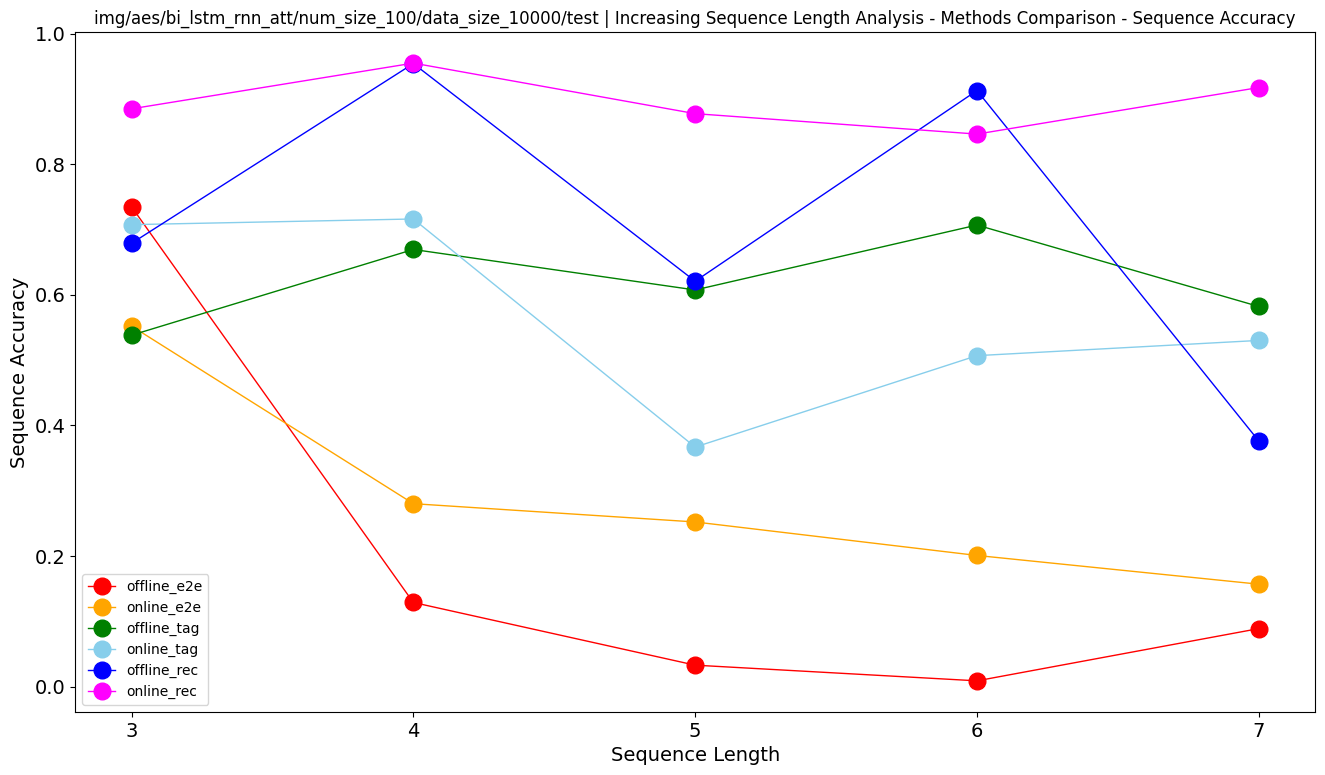

In [1223]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img',
    '{}'.format(data_src), 
    model_name, 
    'num_size_{}'.format(num_size), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Sequence Length Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Sequence Length', 
    ylabel=criteria, 
    save_path=save_path, 
    xticks=range(min_seq_len, max_seq_len+1, interval_seq_len), 
    marker=True
)

## Methods vs. D

In [1363]:
# parameters
candidates = [
    ['offline', 'e2e'], 
    ['online', 'e2e'], 
    ['offline', 'tag'],
    ['online', 'tag'], 
    ['offline', 'rec'], 
    ['online', 'rec']
]
# aes, aor, aec
data_src = 'aes'
# transformer, bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 100
seq_len = 5
min_data_size = 10000
max_data_size = 30000
interval_data_size = 10000
val_or_test = 'test' # val, test

In [1364]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode
    model_name, # model name
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', # data size 
    '{}.txt'.format(val_or_test))

In [1365]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_data_size, max_data_size+1, interval_data_size): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)

log/aes/offline/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_20000/test.txt
log/aes/offline/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_30000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_20000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_30000/test.txt
log/aes/offline/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_20000/test.txt
log/aes/offline/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_30000/test.txt
log/aes/online/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_20000/test.txt
log/aes/online/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_30000/test.tx

In [1366]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [1367]:
# 'Epoch', 'Step', 'Loss', 'Token Accuracy', 'Sequence Accuracy', 'Equation Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_data_size, max_data_size+1, interval_data_size):
        key = LOG_PATH.format(c[0], c[1], i)
#         print(key)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

In [1368]:
print(criteria_dict)

{'offline_e2e': [0.0327, 0.392, 0.9562], 'online_e2e': [0.252, 0.3787, 0.97], 'offline_tag': [0.6073, 0.9007, 0.9209], 'online_tag': [0.3667, 0.87, 0.9133], 'offline_rec': [0.6207, 0.8973, 0.9224], 'online_rec': [0.8773, 0.9873, 0.982]}


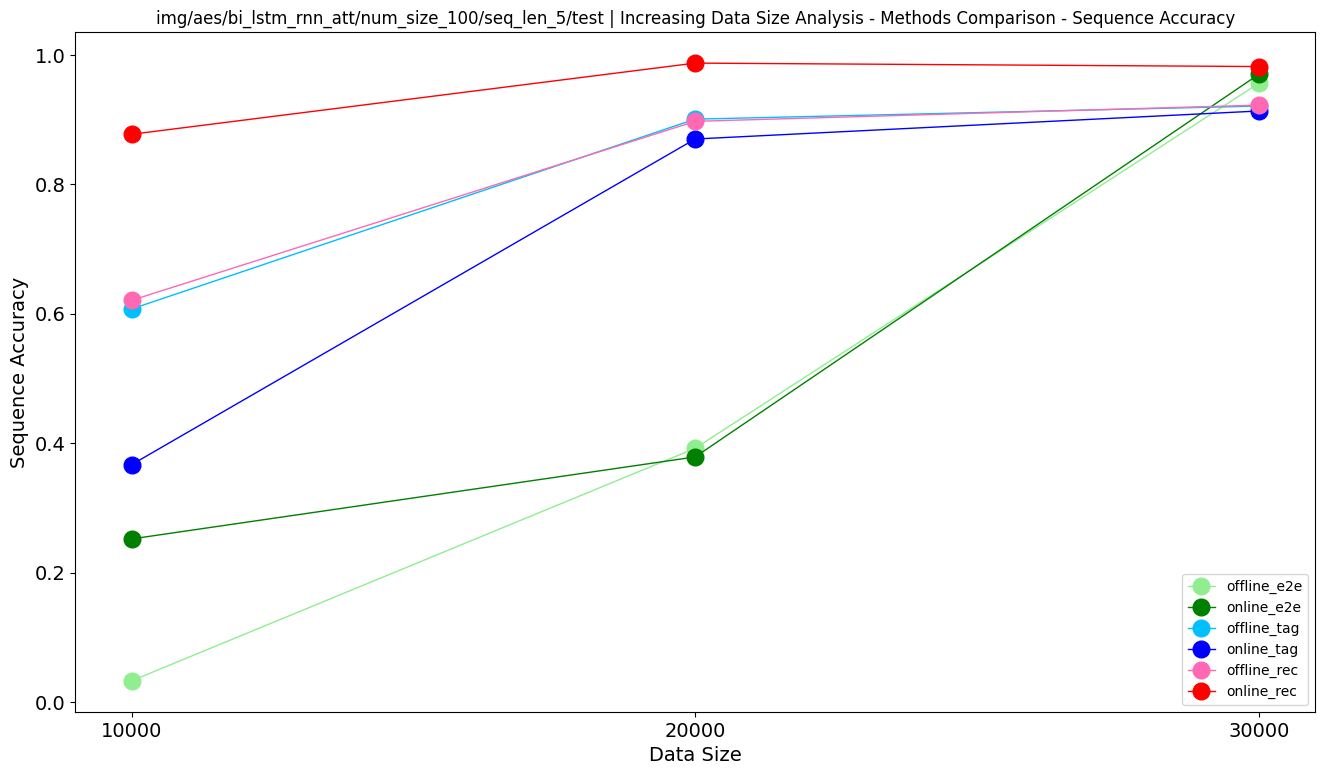

In [1369]:
colors = ['lightgreen', 'g', 'deepskyblue', 'b', 'hotpink', 'r']
save_path = os.path.join(
    'img',
    '{}'.format(data_src), 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Data Size', 
    ylabel=criteria, 
    save_path=save_path, 
    xticks=range(min_data_size, max_data_size+1, interval_data_size), 
    marker=True
)

## Experiments Figures

In [1503]:
# parameters
candidates = [
    ['e2e', 'offline'], 
    ['e2e', 'online'], 
    ['tag', 'offline'], 
    ['tag', 'online'], 
    ['rec', 'offline'], 
    ['rec', 'online']
]
data_src = 'aes' # aes, aor, aec
model_name = 'bi_lstm_rnn_att' # transformer, bi_lstm_rnn_att
num_size = 10
seq_len = 5
data_size = 10000
val_or_test = 'test' # val, test

In [1504]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode 
    model_name, # model name
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [1505]:
# read data
raw_data_dict = {}
for c in candidates:
    file_path = LOG_PATH.format(c[1], c[0])
    print(file_path)
    raw_data_dict[file_path] = load_txt(file_path)

log/aes/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_10000/test.txt


In [1506]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [1508]:
# 'Epoch', 'Step', 'Token Accuracy', 'Sequence Accuracy', 'Equation Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    key = LOG_PATH.format(c[1], c[0])
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

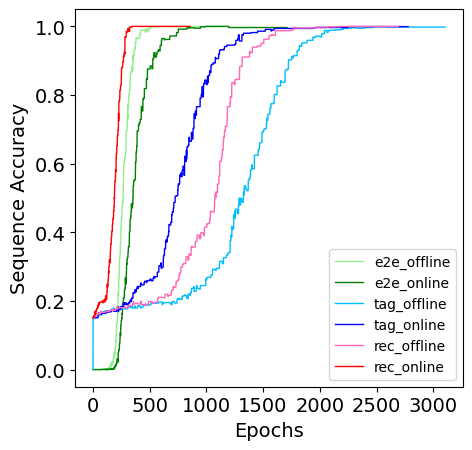

In [1509]:
colors = ['lightgreen', 'g', 'deepskyblue', 'b', 'hotpink', 'r']

aes_save_path = os.path.join('img', 'analysis', 'aes_bilstm_10N_5L_10D.png') 

plt.subplots(figsize = (5, 5), dpi=100)
for key, color in zip(criteria_dict, colors): 
    plt.plot(
        range(len(criteria_dict[key])), 
        criteria_dict[key], 
        markersize=8, 
        color=color, 
        linewidth=1, 
        label=key)
    
plt.xticks(fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Sequence Accuracy', fontsize=14)
plt.legend()
plt.savefig(aes_save_path, dpi=100, bbox_inches='tight')

## Analysis Figures

In [1439]:
criteria_dicts_list = []
save_path = os.path.join('img', 'analysis') 
if not os.path.exists(save_path): os.makedirs(save_path) 
model_name = 'bi_lstm_rnn_att' 
data_src_list = ['aor', 'aes', 'aec'] 
data_mode_list = ['offline', 'online']
method_list = ['e2e', 'tag', 'rec']
colors = ['lightgreen', 'g', 'deepskyblue', 'b', 'hotpink', 'r']
markers = ['v', '^', 's', 'D', 'X', 'o']

### N

In [1440]:
# parameters
val_or_test = 'test' # val, test
aor_N_list = np.arange(10, 50+1, 10).tolist()
aes_N_list = np.arange(100, 300+1, 50).tolist()
aec_N_list = np.arange(10, 50+1, 10).tolist()
L_list = [5, 5, 5]
N_list = [aor_N_list, aes_N_list, aec_N_list] 
D_list = [50000, 10000, 10000]
N_save_path = os.path.join(save_path, 'N.png')

In [1441]:
# define path 
LOG_PATH = os.path.join(
    'log', 
    '{}', # data src 
    '{}', # data mode
    '{}'.format(model_name), 
    '{}', # method
    'num_size_{}', 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}',
    '{}.txt'.format(val_or_test))

In [1442]:
# read log
raw_data_dict_list = []
for data_src, n_range, d in zip(data_src_list, N_list, D_list): 
    raw_data_dict = {}
    for method in method_list: 
        for data_mode in data_mode_list: 
            for n in n_range: 
                file_name = LOG_PATH.format(data_src, data_mode, method, n, d)
                raw_data_dict[file_name] = load_txt(file_name)
    raw_data_dict_list.append(raw_data_dict)

In [1443]:
# extract info from log
data_dict_list = [{k: parse_log(v) for k, v in raw_data_dict.items()} for raw_data_dict in raw_data_dict_list]

In [1444]:
metric_list = ['Equation Accuracy', 'Sequence Accuracy', 'Equation Accuracy'] 
criteria_dicts = []
label = '{}_{}'
for metric, data_dict, data_src, n_range, d in zip(metric_list, data_dict_list, data_src_list, N_list, D_list): 
    criteria_dict = {}
    for method in method_list: 
        for data_mode in data_mode_list: 
            l = label.format(method, data_mode) 
            criteria_list = [] 
            for n in n_range:
                file_name = LOG_PATH.format(data_src, data_mode, method, n, d) 
                criteria_list.append(data_dict[file_name][-1][metric]) 
            criteria_dict[l] = criteria_list 
    criteria_dicts.append(criteria_dict)

In [1445]:
# fig, axes = plt.subplots(ncols=3, figsize=(20, 5), dpi=100)
# for i, (criteria_dict, metric, data_src, n_range) in enumerate(zip(
#     criteria_dicts, metric_list, data_src_list, N_list)): 
#     for key, color, marker in zip(criteria_dict, colors, markers):
#         axes[i].plot(
#             n_range, 
#             criteria_dict[key], 
#             marker=marker, 
#             markersize=8, 
#             color=color, 
#             linewidth=2, 
#             label=key)
#         axes[i].grid(True) 
#         axes[i].xaxis.set_tick_params(labelsize=14)
#         axes[i].yaxis.set_tick_params(labelsize=14) 
#         axes[i].set_xlabel(data_src, fontsize=14)
# axes[1].legend(loc='center', bbox_to_anchor=(0.5, 1.1), ncol=6, fontsize=18)
# fig.text(0.5, -0.05, 'N', ha='center', fontsize=22) 
# fig.text(0.09, 0.5, 'Metric', ha='center', fontsize=22, rotation=90)
# plt.savefig(N_save_path, dpi=100, bbox_inches='tight')
# print(N_save_path)

In [1446]:
criteria_dicts_list.append(criteria_dicts)

### L

In [1447]:
# parameters
val_or_test = 'test' # val, test
aor_L_list = np.arange(5, 9+1, 1).tolist()
aes_L_list = np.arange(3, 7+1, 1).tolist()
aec_L_list = np.arange(5, 9+1, 1).tolist()
L_list = [aor_L_list, aes_L_list, aec_L_list] 
N_list = [10, 100, 10]
D_list = [50000, 10000, 10000]
L_save_path = os.path.join(save_path, 'L.png')

In [1448]:
# define path 
LOG_PATH = os.path.join(
    'log', 
    '{}', # data src 
    '{}', # data mode
    '{}'.format(model_name), 
    '{}', # method
    'num_size_{}', 
    'seq_len_{}', 
    'data_size_{}',
    '{}.txt'.format(val_or_test))

In [1449]:
# read log
raw_data_dict_list = []
for data_src, l_range, n, d in zip(data_src_list, L_list, N_list, D_list): 
    raw_data_dict = {}
    for method in method_list: 
        for data_mode in data_mode_list: 
            for l in l_range: 
                file_name = LOG_PATH.format(data_src, data_mode, method, n, l, d)
                raw_data_dict[file_name] = load_txt(file_name)
    raw_data_dict_list.append(raw_data_dict)

In [1450]:
# extract info from log
data_dict_list = [{k: parse_log(v) for k, v in raw_data_dict.items()} for raw_data_dict in raw_data_dict_list]

In [1451]:
metric_list = ['Equation Accuracy', 'Sequence Accuracy', 'Equation Accuracy'] 
criteria_dicts = []
label = '{}_{}'
for metric, data_dict, data_src, l_range, n, d in zip(
    metric_list, data_dict_list, data_src_list, L_list, N_list, D_list): 
    criteria_dict = {}
    for method in method_list: 
        for data_mode in data_mode_list: 
            tmp_label = label.format(method, data_mode) 
            criteria_list = [] 
            for l in l_range:
                file_name = LOG_PATH.format(data_src, data_mode, method, n, l, d) 
                criteria_list.append(data_dict[file_name][-1][metric]) 
            criteria_dict[tmp_label] = criteria_list 
    criteria_dicts.append(criteria_dict)

In [1452]:
# fig, axes = plt.subplots(ncols=3, figsize=(20, 5), dpi=100)
# for i, (criteria_dict, metric, data_src, l_range) in enumerate(zip(
#     criteria_dicts, metric_list, data_src_list, L_list)): 
#     for key, color, marker in zip(criteria_dict, colors, markers):
#         axes[i].plot(
#             l_range, 
#             criteria_dict[key], 
#             marker=marker, 
#             markersize=8, 
#             color=color, 
#             linewidth=2, 
#             label=key)
#         axes[i].grid(True) 
#         axes[i].xaxis.set_tick_params(labelsize=14)
#         axes[i].yaxis.set_tick_params(labelsize=14) 
#         axes[i].set_xlabel(data_src, fontsize=14)
# axes[1].legend(loc='center', bbox_to_anchor=(0.5, 1.1), ncol=6, fontsize=18)
# fig.text(0.5, -0.05, 'L', ha='center', fontsize=22) 
# fig.text(0.09, 0.5, 'Metric', ha='center', fontsize=22, rotation=90)
# plt.savefig(L_save_path, dpi=100, bbox_inches='tight')
# print(L_save_path)

In [1453]:
criteria_dicts_list.append(criteria_dicts)
criteria_dicts_list.append(criteria_dicts)

### Combine Figures

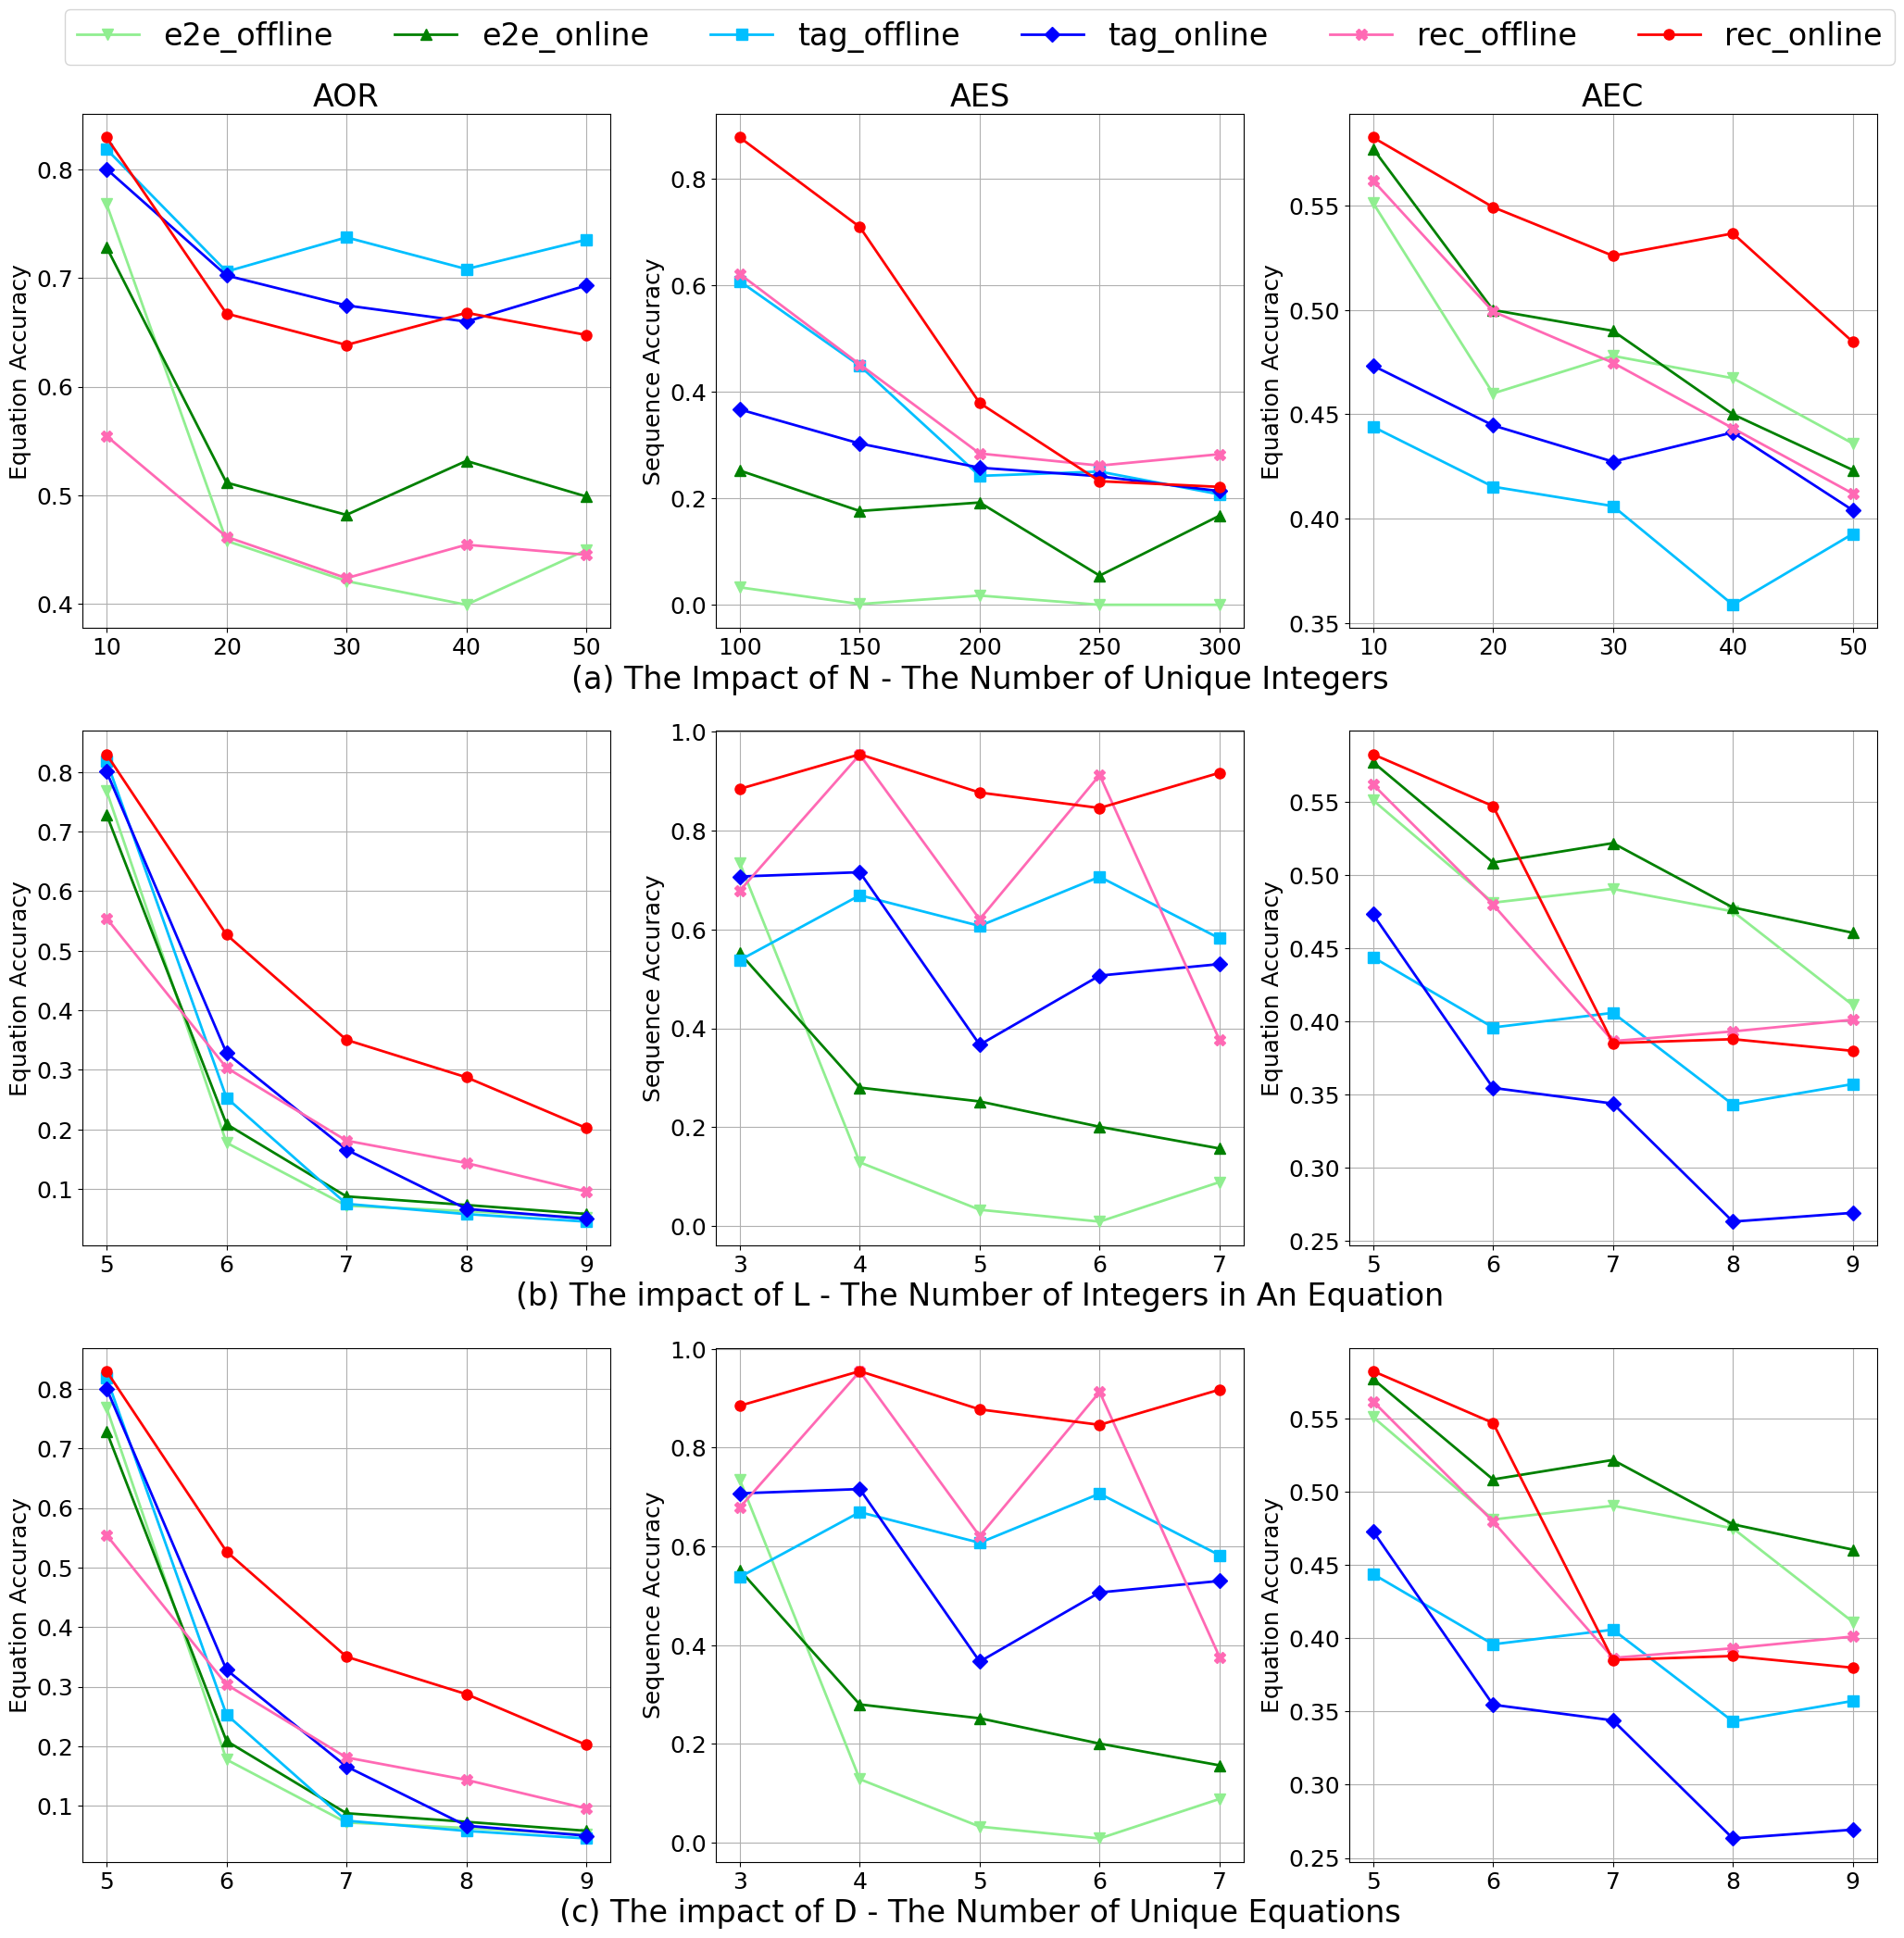

In [1511]:
num_criteria_dicts = len(criteria_dicts_list)
fig, axes = plt.subplots(nrows=num_criteria_dicts, ncols=3, figsize=(25, 25), dpi=100)
for i in range(num_criteria_dicts): 
    criteria_dicts = criteria_dicts_list[i]
    if i == 0:
        # N Figure
        N_list = [aor_N_list, aes_N_list, aec_N_list] 
        L_list = [5, 5, 5]
        D_list = [50000, 10000, 10000] 
        for j, (criteria_dict, metric, data_src, n_range) in enumerate(zip(
            criteria_dicts, metric_list, data_src_list, N_list)): 
            for key, color, marker in zip(criteria_dict, colors, markers):
                axes[i, j].plot(
                    n_range, 
                    criteria_dict[key], 
                    marker=marker, 
                    markersize=8, 
                    color=color, 
                    linewidth=2, 
                    label=key) 
                axes[i, j].grid(True) 
                axes[i, j].xaxis.set_tick_params(labelsize=18)
                axes[i, j].yaxis.set_tick_params(labelsize=18) 
                axes[i, j].set_ylabel(metric, fontsize=18) 
                axes[i, j].set_title(data_src.upper(), fontsize=24) 
    if i == 1: 
        # L Figure
        N_list = [10, 100, 10]
        L_list = [aor_L_list, aes_L_list, aec_L_list] 
        D_list = [50000, 10000, 10000] 
        for j, (criteria_dict, metric, data_src, l_range) in enumerate(zip(
            criteria_dicts, metric_list, data_src_list, L_list)): 
            for key, color, marker in zip(criteria_dict, colors, markers):
                axes[i, j].plot(
                    l_range, 
                    criteria_dict[key], 
                    marker=marker, 
                    markersize=8, 
                    color=color, 
                    linewidth=2, 
                    label=key) 
                axes[i, j].grid(True) 
                axes[i, j].xaxis.set_tick_params(labelsize=18)
                axes[i, j].yaxis.set_tick_params(labelsize=18) 
                axes[i, j].set_ylabel(metric, fontsize=18) 
    if i == 2:
        # L Figure
        N_list = [10, 100, 10]
        L_list = [aor_L_list, aes_L_list, aec_L_list] 
        D_list = [50000, 10000, 10000] 
        for j, (criteria_dict, metric, data_src, l_range) in enumerate(zip(
            criteria_dicts, metric_list, data_src_list, L_list)): 
            for key, color, marker in zip(criteria_dict, colors, markers):
                axes[i, j].plot(
                    l_range, 
                    criteria_dict[key], 
                    marker=marker, 
                    markersize=8, 
                    color=color, 
                    linewidth=2, 
                    label=key)
                axes[i, j].grid(True) 
                axes[i, j].xaxis.set_tick_params(labelsize=18)
                axes[i, j].yaxis.set_tick_params(labelsize=18) 
                axes[i, j].set_ylabel(metric, fontsize=18) 
                
axes[0, 1].legend(loc='center', bbox_to_anchor=(0.5, 1.15), ncol=6, fontsize=24) 
axes[0, 1].set_xlabel('(a) The Impact of N - The Number of Unique Integers', fontsize=24) 
axes[1, 1].set_xlabel('(b) The impact of L - The Number of Integers in An Equation', fontsize=24) 
axes[2, 1].set_xlabel('(c) The impact of D - The Number of Unique Equations', fontsize=24)
plt.savefig(os.path.join(save_path, 'analysis.png'), dpi=100, bbox_inches='tight')